<a href="https://colab.research.google.com/github/Sudharsan1406/Project-5/blob/main/Project_5_Brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **✅ 1. Understand the Dataset**

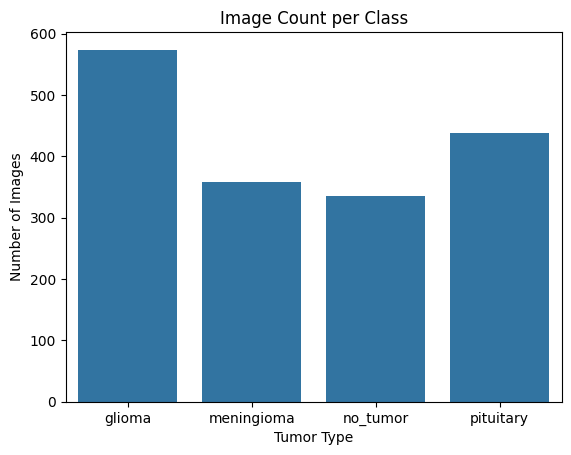

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "/content/drive/MyDrive/Project 5/train"
categories = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
class_counts = {}

for category in categories:
    class_path = os.path.join(base_path, category)
    class_counts[category] = len(os.listdir(class_path))

# Barplot
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Image Count per Class")
plt.ylabel("Number of Images")
plt.xlabel("Tumor Type")
plt.show()

# **✅ 2. Data Preprocessing & Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_path = "/content/drive/MyDrive/Project 5/train"
valid_path = "/content/drive/MyDrive/Project 5/valid"
test_path  = "/content/drive/MyDrive/Project 5/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:

train_data = train_datagen.flow_from_directory(
    train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

val_data = val_test_datagen.flow_from_directory(
    valid_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

test_data = val_test_datagen.flow_from_directory(
    test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

Found 1705 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


# **✅ 3. Custom CNN Model Building**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import tensorflow as tf

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),

    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(4, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compile & Train Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("custom_cnn.h5", monitor='val_accuracy', save_best_only=True)

history = model.fit(train_data, validation_data=val_data, epochs=20, callbacks=[early_stop, checkpoint])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4683 - loss: 4.2398

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 532s 10s/step - accuracy: 0.4698 - loss: 4.2302 - val_accuracy: 0.5239 - val_loss: 3.4543
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 556ms/step - accuracy: 0.6504 - loss: 2.7643 - val_accuracy: 0.2351 - val_loss: 3.6759
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 574ms/step - accuracy: 0.6975 - loss: 2.1004 - val_accuracy: 0.2351 - val_loss: 6.8239
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 554ms/step - accuracy: 0.7479 - loss: 1.6865 - val_accuracy: 0.2351 - val_loss: 9.3028
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 558ms/step - accuracy: 0.7300 - loss: 1.4733 - val_accuracy: 0.2351 - val_loss: 10.9817
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 555ms/step - accuracy: 0.7452 - loss: 1.2563 - val_accuracy: 0.2351 - val_loss: 10.9973


## **Classification Report**

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 9s/step
              precision    recall  f1-score   support

      glioma       0.63      0.97      0.77        80
  meningioma       0.00      0.00      0.00        63
    no_tumor       0.00      0.00      0.00        49
   pituitary       0.41      0.93      0.56        54

    accuracy                           0.52       246
   macro avg       0.26      0.48      0.33       246
weighted avg       0.30      0.52      0.37       246



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


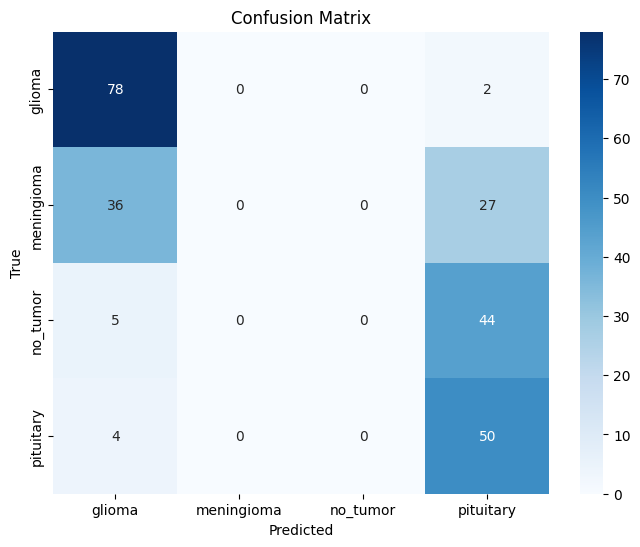

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))


# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

🔍 What This Tells Us ...

✅ Good performance on:

Glioma: High recall (0.97), good precision (0.63)

Pituitary: High recall (0.93), but lower precision (0.41)

❌ Very poor performance on:

Meningioma & No_tumor: Precision, recall, F1 = 0

## **Add Class Weights (to Custom CNN)**

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Get class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(test_data.classes),
    y=test_data.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Then in model.fit:
model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    class_weight=class_weights_dict
)


Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 628ms/step - accuracy: 0.6672 - loss: 2.7524 - val_accuracy: 0.2351 - val_loss: 3.1803
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 607ms/step - accuracy: 0.7176 - loss: 2.0241 - val_accuracy: 0.4622 - val_loss: 2.8284
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 557ms/step - accuracy: 0.7074 - loss: 1.7094 - val_accuracy: 0.5139 - val_loss: 2.9071
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 565ms/step - accuracy: 0.6713 - loss: 1.5138 - val_accuracy: 0.5458 - val_loss: 2.8067
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 695ms/step - accuracy: 0.7071 - loss: 1.3187 - val_accuracy: 0.2809 - val_loss: 3.6425
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 561ms/step - accuracy: 0.7251 - loss: 1.1684 - val_accuracy: 0.3147 - val_loss: 4.1669
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 594ms/step - accuracy: 0.7155 - loss: 1.0770 - val_accuracy: 0.2829 - val_loss: 7.4711
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 580ms/step - accuracy: 0.7429 - loss: 1.0078 - val_accu

***Interpretation:***

This is a classic case of overfitting:

Your model learns the training data well (78% accuracy)

But performs very poorly on validation (only 19%)

The validation loss is very high, meaning it's making highly uncertain and wrong predictions on unseen data

# **✅ 4. Transfer Learning with MobileNetV2**

## **✅ Step 1: import Required Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## **✅ Step 2: Setup Image Data Generators**

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_path = "/content/drive/MyDrive/Project 5/train"
valid_path = "/content/drive/MyDrive/Project 5/valid"
test_path  = "/content/drive/MyDrive/Project 5/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)

val_data = val_test_datagen.flow_from_directory(
    valid_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

Found 1705 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


## **✅ Step 3: Load MobileNetV2 Base Model**

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **✅ Step 4: Add Custom Classification Layers**

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)  # 4 classes

model = Model(inputs=base_model.input, outputs=predictions)

## **✅ Step 5: Compile and Train (Initial Phase)**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("mobilenetv2_best.h5", monitor='val_accuracy', save_best_only=True)

In [ ]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=10,
                    callbacks=[early_stop, checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.5664 - loss: 1.0949

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 809ms/step - accuracy: 0.5685 - loss: 1.0894 - val_accuracy: 0.7151 - val_loss: 0.7961
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.8167 - loss: 0.4901

54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 559ms/step - accuracy: 0.8166 - loss: 0.4899 - val_accuracy: 0.8386 - val_loss: 0.4402
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 553ms/step - accuracy: 0.8417 - loss: 0.4262 - val_accuracy: 0.7968 - val_loss: 0.5897
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 633ms/step - accuracy: 0.8571 - loss: 0.3773 - val_accuracy: 0.8287 - val_loss: 0.4695
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 555ms/step - accuracy: 0.8424 - loss: 0.4064 - val_accuracy: 0.8068 - val_loss: 0.5366
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 550ms/step - accuracy: 0.8765 - loss: 0.3455 - val_accuracy: 0.8127 - val_loss: 0.4816
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.8690 - loss: 0.3449

54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 560ms/step - accuracy: 0.8692 - loss: 0.3447 - val_accuracy: 0.8506 - val_loss: 0.4182
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 565ms/step - accuracy: 0.8782 - loss: 0.3286 - val_accuracy: 0.8446 - val_loss: 0.4006
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 572ms/step - accuracy: 0.8975 - loss: 0.2882 - val_accuracy: 0.8327 - val_loss: 0.4576
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 549ms/step - accuracy: 0.8710 - loss: 0.3217 - val_accuracy: 0.8406 - val_loss: 0.4589


## **✅ Step 6: Fine-Tune Top Layers (Optional Boost)**

In [ ]:
# Unfreeze last few layers of base model
base_model.trainable = True

# Re-compile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
fine_tune_history = model.fit(train_data,
                              validation_data=val_data,
                              epochs=10,
                              callbacks=[early_stop])

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.4377 - loss: 1.9014 - val_accuracy: 0.8247 - val_loss: 0.4612
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 580ms/step - accuracy: 0.6994 - loss: 0.7912 - val_accuracy: 0.7988 - val_loss: 0.5223
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 591ms/step - accuracy: 0.8230 - loss: 0.5059 - val_accuracy: 0.8088 - val_loss: 0.5140
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 569ms/step - accuracy: 0.8403 - loss: 0.4466 - val_accuracy: 0.8207 - val_loss: 0.4927
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 597ms/step - accuracy: 0.8458 - loss: 0.4057 - val_accuracy: 0.8127 - val_loss: 0.5097
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 572ms/step - accuracy: 0.8547 - loss: 0.3965 - val_accuracy: 0.8127 - val_loss: 0.5304


## **✅ Step 7: Evaluate on Test Data**

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"MobileNetV2 Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.8438 - loss: 0.4445
MobileNetV2 Test Accuracy: 0.7967


## **✅ Step 8: Save Model**

In [ ]:
model.save("/content/drive/MyDrive/Project 5/mobilenetv2_final.h5")

## **✅ Step 9: Classification Report & Confusion Matrix**


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 640ms/step
              precision    recall  f1-score   support

      glioma       0.73      1.00      0.84        80
  meningioma       0.84      0.41      0.55        63
    no_tumor       0.91      0.82      0.86        49
   pituitary       0.82      0.93      0.87        54

    accuracy                           0.80       246
   macro avg       0.82      0.79      0.78       246
weighted avg       0.81      0.80      0.78       246



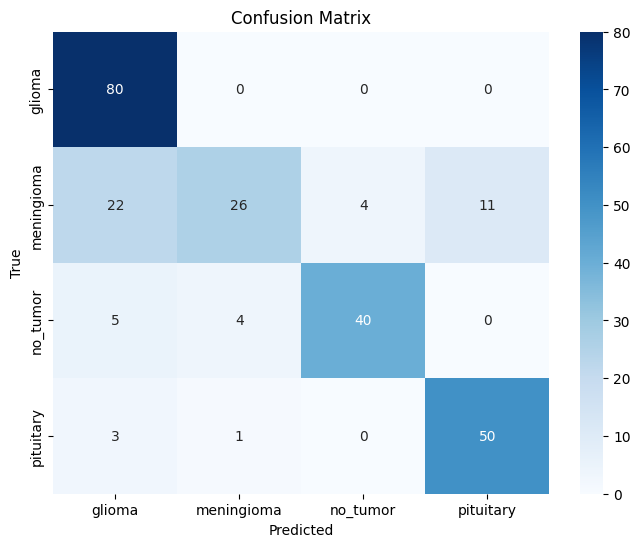

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **✅ 5. 📊 Model Comparison Report**

| Metric               | Custom CNN | MobileNetV2 (Transfer Learning) |
| -------------------- | ---------- | ------------------------------- |
| **Test Accuracy**    | 52% ❌     | **80% ✅**                       |
| **Glioma F1-Score**  | 0.77       | 0.84                            |
| **Meningioma F1**    | 0.00 ❌     | 0.55 ✅                          |
| **No Tumor F1**      | 0.00 ❌     | 0.86 ✅                          |
| **Pituitary F1**     | 0.56       | 0.87 ✅                          |
| **Macro Avg F1**     | 0.33 ❌     | **0.78 ✅**                      |
| **Model Size**       | Small      | Medium (with pretrained layers) |
| **Training Time**    | Low        | Moderate                        |
| **Generalization**   | Poor       | Strong ✅                        |
| **Deployment Ready** | ❌ No       | ✅ Yes                           |


## Key Insights :

MobileNetV2 outperforms Custom CNN on every class, especially the two weakest (meningioma and no_tumor).

Custom CNN overfit training data and couldn't generalize well.

Transfer learning provided powerful feature extraction from pretrained ImageNet weights, leading to robust performance.

MobileNetV2 is suitable for real-world deployment via Streamlit.

# **✅ 6. Streamlit**

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00


In [ ]:
model.save("/content/drive/MyDrive/Project 5/mobilenetv2_final.h5")


In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/Project 5/mobilenetv2_final.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = tf.keras.models.load_model("/content/mobilenetv2_best.h5")

In [ ]:
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

import base64
# Function to load and encode local jpg image
def get_base64_of_bin_file(bin_file):
    with open(bin_file, 'rb') as f:
        data = f.read()
    return base64.b64encode(data).decode()

# Local image filename (same folder)
image_file = 'aaa.jpg'

# Get base64 string
img_base64 = get_base64_of_bin_file(image_file)

# Inject HTML + CSS for background
page_bg_img = f"""
<style>
.stApp {{
  background-image: url("data:image/jpg;base64,{img_base64}");
  background-size: cover;
  background-repeat: no-repeat;
  background-attachment: fixed;
}}
</style>
"""

# Load CSS
st.markdown(page_bg_img, unsafe_allow_html=True)

# Sidebar for navigation
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Project Introduction", "Predicted Tumor Type", "Creator Info"])

# -------------------------------- PAGE 1: Introduction --------------------------------
if page == "Project Introduction":
    st.title("🧠 Brain Tumor MRI Image Classification  ")
    st.write("\n")
    st.write("\n")
    st.write("""
    ##### This project aims to develop a deep learning-based solution for classifying brain MRI
    ##### images into multiple categories according to tumor type. It involves building a custom
    ##### CNN model from scratch and enhancing performance through transfer learning using
    ##### pretrained models. The project also includes deploying a user-friendly Streamlit web
    ##### application to enable real-time tumor type predictions from uploaded MRI images. """)
    st.write("\n")
    st.write("\n")

    st.markdown("""\n
    ### Real-time Business Use Cases:  \n
        ● AI-Assisted Medical Diagnosis \n
        ● Early Detection and Patient Triage \n
        ● Research and Clinical Trials \n
        ● Second-Opinion AI Systems \n  """)

    st.markdown("""
     ### Problem Domain: \n
        ● Medical Imaging — Image Classification """)

# -------------------------------- PAGE 2: Predicted Tumor Type --------------------------------
elif page == "Predicted Tumor Type":

    # Load model
    model = tf.keras.models.load_model("mobilenetv2_final.h5")

    # Class names
    class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

    st.title("🧠 Brain Tumor MRI Classifier")
    st.write("Upload an MRI image to classify the tumor type.")

    uploaded_file = st.file_uploader("Choose an image", type=["jpg", "png", "jpeg"])

    if uploaded_file:
        image = Image.open(uploaded_file).convert('RGB')
        st.image(image, caption='Uploaded Image', use_column_width=True)

        # Preprocessing
        img = image.resize((224, 224))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)[0]
        predicted_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction)

        st.markdown(f"### 🧠 Tumor Type: **{predicted_class.upper()}**")
        st.markdown(f"### 📊 Confidence: **{confidence * 100:.2f}%**")

# -------------------------------- PAGE 3: Creator Info --------------------------------

elif page == "Creator Info":
    st.title("👨‍💻 Creator of this Project")
    st.write("""
#    **Developed by:** Sudharsan M S
#    **Skills:**
## Python,
## Deep Learning,
## Transfer Learning,
## Model Evaluation,
## Streamlit
    """)
    st.image('saa.jpg', width=150)


2025-07-02 07:34:16.021 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 07:34:16.180 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-02 07:34:16.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 07:34:16.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 07:34:16.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 07:34:16.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 07:34:16.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 07:34:16.193 Thread 'MainThread': mi